# Yosemite Village yearly weather
Temperature is cyclical, not only on a 24 hour basis but also on a yearly basis. Convert the dataset into a richer format whereby the day of the year is also captured. For example the time “20150212 1605”, can be converted into (43, 965) because the 12th of February is the 43rd day of the year, and 16:05 is the 965th minute of the day.

This data covers 6 years, so split the data into a training set of the first 5 years, and a testing set of the 6th year.

Using the temperature dataset from your pre-class work (https://course-resources.minerva.kgi.edu/uploaded_files/mke/rj3Edn/yosemite-temperatures.zip) perform the following:

1. Cover each input dimension with a list of radial basis functions. This turns the pair of inputs into a much richer representation, mapping (d,t) into (Φ₁(d), Φ₂(t)). Experiment with different numbers of radial basis functions and different widths of the radial basis function in different dimensions.
2. Using this new representation, build a linear parameter model that captures both seasonal variations and daily variations.
3. Create two plots, one showing the time-of-day contribution, and one showing the time-of-year contribution.
4. (Optional) Make a 3D plot showing temperature as a function of (day, time). Make sure to label your axes!
5. Using R², quantify how your model performs on the testing data if you:
- Train with just the daily component of the model
- Train with just the yearly component of the model
- Train with the full model.
6. Please convert everything to a single PDF file and submit it. Be sure to include all the code necessary to reproduce your results, but please leave out exploratory code that does not contribute to any figures or final results. This assignment is not just about code, and any choices which need justification, or insights you gain should be included in plain English.

In [16]:
#load data from 2011 - 2015 
years = range(2011, 2016)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years] #contains files


'''
steps 
-- cover each input dimensions with radial basis functions
-- build linear parameter model
-- plots 3D plot 
-- evaluate model performance 
'''

'\nsteps \n-- cover each input dimensions with radial basis functions\n-- build linear parameter model\n-- plots 3D plot \n-- evaluate model performance \n'

[1435.] [28.3]
[0.] [-10.1]
1000 1000
Score on training data =  -1.306752866369584
all_x.shape (1000, 1)
expanded_x.shape (1000, 1000)
all_y.shape (1000, 1)
1000


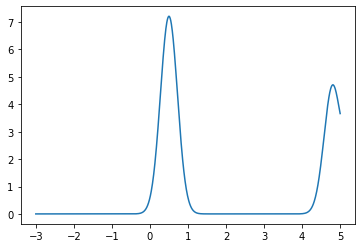

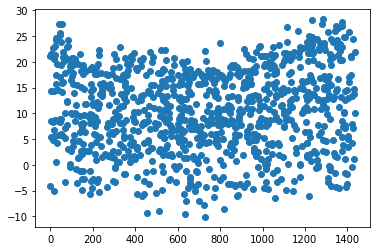

In [5]:
### PCW ### 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics.pairwise import rbf_kernel #get radial basis function kernel 
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np


years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]


usecols = [1, 2, 8] #[WBANNO (station number), UTC Date, Latitude]

data = [np.loadtxt(f, usecols=usecols) for f in files] #load data with relevant columns
#vstack() function is used to stack the sequence of input arrays vertically to make a single array. 
data = np.vstack(data) 

print(data)

# Map data from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000 

x_train = data[valid, 1].reshape(-1, 1) #utc time in minutes 
y_train = data[valid, 2] #latitude

import random 
sigma = 0.1
alp = 0.0001

number_of_rows = x_train.shape[0]
random_indices = np.random.choice(number_of_rows, size=1000, replace=True)
w = np.random.sample(size =1000)

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_train = x_train[random_indices, :]
y_train = y_train[random_indices, :]

print(max(x_train), max(y_train))
print(min(x_train), min(y_train))
print(len(x_train),len(y_train))

rbf = rbf_kernel(y_train, x_train, gamma=1.0/sigma)
regression = Ridge(alpha=alp, fit_intercept=False)
regression.fit(rbf, y_train)

print("Score on training data = ", regression.score(rbf, y_train))
all_rbf = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_rbf = rbf_kernel(all_rbf, y_train, gamma=1 / sig)
all_y = regression.predict(expanded_rbf)

print("all_x.shape", all_rbf.shape)
print("expanded_x.shape", expanded_rbf.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_rbf, all_y)
#plt.scatter(x_train, weights)

# Zoom in and see how well predictions fit the data
zoom_ind = (all_rbf > x_train.min()) & (all_rbf < x_train.max())
plt.figure()
print(len(zoom_ind))

#plt.plot(all_rbf[zoom_ind], all_y[zoom_ind])
plt.scatter(x_train, y_train)
plt.show()